<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Unique_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
unino = set(Concat.UNINO)
print(len(unino))
pd.DataFrame(data = {'UNINO':list(unino)}).to_csv('/content/drive/MyDrive/Sinopac/Results/Final_unique_name.csv')

208238


In [2]:
import pandas as pd
unino = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_unique_name.csv', index_col = 0)
unino

,UNINO
0,E2796424610
1,S2750335000
2,H2022317250
3,N1795791190
4,W1229355860
...,...
208233,A2766179340
208234,L2795775710
208235,N2709902460
208236,I2222133120


##敘述統計
1. Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
2. 有多少人收到1次、2次、3次....6次 treatment?
3. 假設(1)裡面不重複的treatment有XT人次， (2)裡面不重複的control有XC人次，我們能組出資料集，裡面有XT人次和XC人次在這6個實驗月份每一round的X & Y (Deal or Value)嗎? 這樣子的資料集大小會變成 XT*6 + XC*6個rows

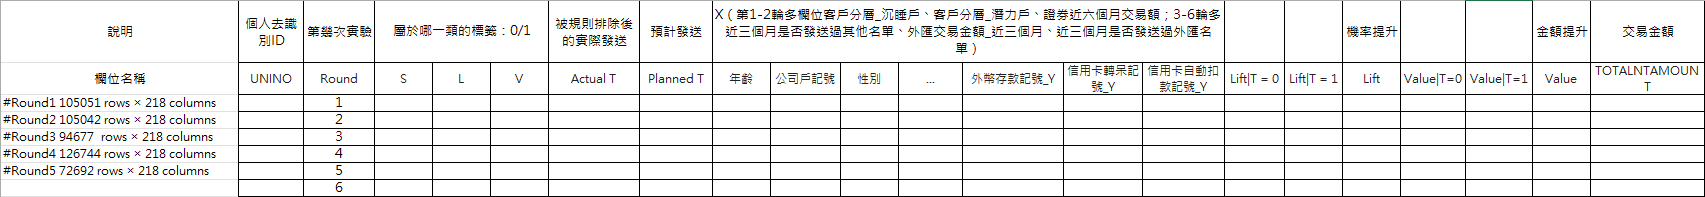

資料格式：
UNINO | Round | S | L | V | Actual T | Planned T |年齡| 公司戶記號 | 性別|	...	|外幣存款記號_Y | 信用卡轉呆記號_Y | 信用卡自動扣款記號_Y	| Lift|T = 0 |	Lift|T = 1| Lift |	Value|T=0 |	Value|T=1	| Value	| TOTALNTAMOUNT|

* #Round1 105051 rows × 218 columns
* Round2 103836 rows × 218 columns
* Round3 94677  rows × 218 columns
* Round4 126735 rows × 218 columns
* Round5 72692 rows × 218 columns
* Round6 93980 rows × 218 columns

##Round1

In [96]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df = pd.merge(df.loc[:, df.columns != 'TOTALNTAMOUNT'], v, on='UNINO', how='left')
df

,UNINO,標籤,TAG,發送名單,TOTALNTAMOUNT
0,A1220046320,NaN,數位通路_換匯名單_F群_未發,0,0.0
1,A1221949610,數位通路_換匯名單_F群,NaN,1,0.0
2,A1224193120,數位通路_換匯名單_G群,NaN,1,0.0
3,A1228308980,數位通路_換匯名單_G群,NaN,1,0.0
4,A1228865070,數位通路_換匯名單_F群,NaN,1,0.0
...,...,...,...,...,...
103919,Y2725958190,數位通路_換匯名單_C群,NaN,1,0.0
103920,Y2727395520,NaN,數位通路_換匯名單_F群_未發,0,0.0
103921,Y2727650750,數位通路_換匯名單_F群,NaN,0,0.0
103922,Z1222922330,數位通路_換匯名單_G群,NaN,0,0.0


In [97]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-97-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-97-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-97-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1220046320,數位通路_換匯名單_F群_未發,0,0,0.0
1,A1221949610,數位通路_換匯名單_F群,1,1,0.0
2,A1224193120,數位通路_換匯名單_G群,1,1,0.0
3,A1228308980,數位通路_換匯名單_G群,1,1,0.0
4,A1228865070,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
103703,Y2725958190,數位通路_換匯名單_C群,1,1,0.0
103704,Y2727395520,數位通路_換匯名單_F群_未發,0,0,0.0
103705,Y2727650750,數位通路_換匯名單_F群,1,0,0.0
103706,Z1222922330,數位通路_換匯名單_G群,1,0,0.0


In [98]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 1
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1220046320,0,0,0.0,1,0,1,1
1,A1221949610,1,1,0.0,1,0,1,1
2,A1224193120,1,1,0.0,1,1,1,1
3,A1228308980,1,1,0.0,1,1,1,1
4,A1228865070,1,1,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...
103703,Y2725958190,1,1,0.0,0,0,1,1
103704,Y2727395520,0,0,0.0,1,0,1,1
103705,Y2727650750,1,0,0.0,1,0,1,1
103706,Z1222922330,1,0,0.0,1,1,1,1


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 1
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,0.0,0.0,0.0,0,1,0,1
1,S2750335000,0.0,0.0,0.0,0,0,0,1
2,H2022317250,0.0,0.0,0.0,0,0,0,1
3,N1795791190,1.0,1.0,0.0,0,1,0,1
4,W1229355860,0.0,0.0,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...
208233,A2766179340,0.0,0.0,0.0,0,0,0,1
208234,L2795775710,1.0,1.0,0.0,1,0,0,1
208235,N2709902460,0.0,0.0,0.0,0,1,0,1
208236,I2222133120,0.0,0.0,0.0,0,0,0,1


In [ ]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T = 0', 'Uplift_mean|T = 1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265
1,S2750335000,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475
2,H2022317250,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083
3,N1795791190,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171
4,W1229355860,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812
...,...,...,...,...,...,...,...
208233,A2766179340,0.003574,0.038388,0.005109,240.735267,1920.851712,226.090259
208234,L2795775710,0.005339,0.035475,0.011739,1263.983824,7168.084994,332.880816
208235,N2709902460,0.004084,0.037854,0.023651,391.448746,2948.370612,160.228877
208236,I2222133120,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202308_v1.csv', index_col=0)
#X[['換匯發送名單','TOTALNTAMOUNT', '跨售行為']]
# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,E2796424610,53.0,0.0,2.0,0.0,1000.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,S2750335000,39.0,0.0,2.0,0.0,315.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,H2022317250,43.0,0.0,2.0,0.0,331.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,N1795791190,54.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,W1229355860,75.0,0.0,1.0,0.0,1152.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,35.0,0.0,2.0,0.0,465.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
208234,L2795775710,53.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
208235,N2709902460,23.0,0.0,2.0,0.0,250.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
208236,I2222133120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯購買名單.csv', usecols = ['UNINO', 'TOTALNTAMOUNT'])
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     1.420407e+03
std      5.088240e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.747451e+07
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,1,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.003574,0.038388,0.005109,240.735267,1920.851712,226.090259,0.0
208234,L2795775710,1,1,0,0,1.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005339,0.035475,0.011739,1263.983824,7168.084994,332.880816,0.0
208235,N2709902460,1,0,1,0,0.0,0.0,23.0,0.0,2.0,...,1.0,0.0,0.0,0.004084,0.037854,0.023651,391.448746,2948.370612,160.228877,0.0
208236,I2222133120,1,0,0,0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
#儲存結果
#Round1 208238 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)

## Round2

In [ ]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/12月外匯名單_成效追蹤_人.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df['TOTALNTAMOUNT'] = v['TOTALNTAMOUNT']
df.reset_index(drop= True)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1422511920,0.0,NaN,數位通路_換匯名單_B群_未發,0
1,A1520164620,0.0,數位通路_換匯名單_F群,NaN,1
2,A1520193310,0.0,數位通路_換匯名單_B群,NaN,1
3,A1520212860,0.0,數位通路_換匯名單_B群,NaN,0
4,A1520293310,0.0,數位通路_換匯名單_G群,NaN,1
...,...,...,...,...,...
103831,Z1222213310,0.0,NaN,數位通路_換匯名單_F群_未發,0
103832,Z1222291870,0.0,數位通路_換匯名單_G群,NaN,1
103833,Z1229902750,0.0,NaN,數位通路_換匯名單_F群_未發,0
103834,Z2222847680,0.0,數位通路_換匯名單_A群,NaN,0


In [ ]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-13-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-13-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-13-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422511920,數位通路_換匯名單_B群_未發,0,0,0.0
1,A1520164620,數位通路_換匯名單_F群,1,1,0.0
2,A1520193310,數位通路_換匯名單_B群,1,1,0.0
3,A1520212860,數位通路_換匯名單_B群,1,0,0.0
4,A1520293310,數位通路_換匯名單_G群,1,1,0.0
...,...,...,...,...,...
103831,Z1222213310,數位通路_換匯名單_F群_未發,0,0,0.0
103832,Z1222291870,數位通路_換匯名單_G群,1,1,0.0
103833,Z1229902750,數位通路_換匯名單_F群_未發,0,0,0.0
103834,Z2222847680,數位通路_換匯名單_A群,1,0,0.0


In [ ]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 2
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422511920,0,0,0.0,0,1,0,2
1,A1520164620,1,1,0.0,1,0,1,2
2,A1520193310,1,1,0.0,0,1,0,2
3,A1520212860,1,0,0.0,0,1,0,2
4,A1520293310,1,1,0.0,1,1,1,2
...,...,...,...,...,...,...,...,...
103831,Z1222213310,0,0,0.0,1,0,1,2
103832,Z1222291870,1,1,0.0,1,1,1,2
103833,Z1229902750,0,0,0.0,1,0,1,2
103834,Z2222847680,1,0,0.0,1,0,0,2


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 2
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,1.0,0.0,0.0,1,0,0,2
1,S2750335000,0.0,0.0,0.0,0,0,0,2
2,H2022317250,0.0,0.0,0.0,0,0,0,2
3,N1795791190,0.0,0.0,0.0,0,0,0,2
4,W1229355860,0.0,0.0,0.0,0,0,0,2
...,...,...,...,...,...,...,...,...
208233,A2766179340,0.0,0.0,0.0,0,0,0,2
208234,L2795775710,1.0,1.0,0.0,1,1,0,2
208235,N2709902460,0.0,0.0,0.0,0,0,0,2
208236,I2222133120,0.0,0.0,0.0,0,0,0,2


In [ ]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202311.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.005817,0.031967,-0.008775,450.574533,1815.456351,-1345.869014
1,S2750335000,0.002409,0.038439,0.008680,215.630438,2783.845480,223.912817
2,H2022317250,0.004187,0.035416,0.010025,451.663652,3206.743211,490.000208
3,N1795791190,0.002954,0.038674,0.003775,289.996806,3297.379257,225.553732
4,W1229355860,0.004520,0.032373,0.050648,717.141941,4608.180291,994.755003
...,...,...,...,...,...,...,...
208233,A2766179340,0.003678,0.037614,0.005117,254.150978,1946.896187,226.196560
208234,L2795775710,0.005613,0.034867,0.039833,1307.161786,6889.470231,-1080.699871
208235,N2709902460,0.003281,0.041826,0.001447,310.472795,3161.901659,-12.364473
208236,I2222133120,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202311.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202311.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)

# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,E2796424610,53.0,0.0,2.0,0.0,1000.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,S2750335000,39.0,0.0,2.0,0.0,315.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,H2022317250,43.0,0.0,2.0,0.0,331.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,N1795791190,55.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,W1229355860,75.0,0.0,1.0,0.0,1152.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,35.0,0.0,2.0,0.0,465.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
208234,L2795775710,53.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
208235,N2709902460,23.0,0.0,2.0,0.0,250.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
208236,I2222133120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/12月外匯購買名單.csv', usecols = ['UNINO', 'TOTALNTAMOUNT'])
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     1.727323e+03
std      4.218920e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.198300e+06
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,2,1,0,0,0.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005817,0.031967,-0.008775,450.574533,1815.456351,-1345.869014,0.0
1,S2750335000,2,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.002409,0.038439,0.008680,215.630438,2783.845480,223.912817,0.0
2,H2022317250,2,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004187,0.035416,0.010025,451.663652,3206.743211,490.000208,0.0
3,N1795791190,2,0,0,0,0.0,0.0,55.0,0.0,1.0,...,0.0,0.0,0.0,0.002954,0.038674,0.003775,289.996806,3297.379257,225.553732,0.0
4,W1229355860,2,0,0,0,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004520,0.032373,0.050648,717.141941,4608.180291,994.755003,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,2,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.003678,0.037614,0.005117,254.150978,1946.896187,226.196560,0.0
208234,L2795775710,2,1,1,0,1.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005613,0.034867,0.039833,1307.161786,6889.470231,-1080.699871,0.0
208235,N2709902460,2,0,0,0,0.0,0.0,23.0,0.0,2.0,...,1.0,0.0,0.0,0.003281,0.041826,0.001447,310.472795,3161.901659,-12.364473,0.0
208236,I2222133120,2,0,0,0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,2,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.003678,0.037614,0.005117,254.150978,1946.896187,226.196560,0.0
208234,L2795775710,2,1,1,0,1.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005613,0.034867,0.039833,1307.161786,6889.470231,-1080.699871,0.0
208235,N2709902460,2,0,0,0,0.0,0.0,23.0,0.0,2.0,...,1.0,0.0,0.0,0.003281,0.041826,0.001447,310.472795,3161.901659,-12.364473,0.0
208236,I2222133120,2,0,0,0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
#儲存結果
#Round1 208238 rows × 218 columns
#Round2 208238 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)

In [ ]:
del Concat

## Round3

In [ ]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/2月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df['TOTALNTAMOUNT'] = v['TOTALNTAMOUNT']
df.reset_index(drop= True)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1520047570,0.0,數位通路_換匯名單_D群,NaN,1
1,A1520929950,0.0,NaN,數位通路_換匯名單_A群_未發,0
2,A1521108250,0.0,NaN,數位通路_換匯名單_A群_未發,0
3,A1521565520,0.0,數位通路_換匯名單_A群,NaN,1
4,A1521568210,0.0,NaN,數位通路_換匯名單_F群_未發,0
...,...,...,...,...,...
94717,Z2222152570,0.0,數位通路_換匯名單_D群,NaN,1
94718,Z2222682380,0.0,數位通路_換匯名單_A群,NaN,1
94719,Z2222759400,0.0,數位通路_換匯名單_D群,NaN,1
94720,Z2229768430,0.0,數位通路_換匯名單_A群,NaN,0


In [ ]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-25-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-25-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-25-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520047570,數位通路_換匯名單_D群,1,1,0.0
1,A1520929950,數位通路_換匯名單_A群_未發,0,0,0.0
2,A1521108250,數位通路_換匯名單_A群_未發,0,0,0.0
3,A1521565520,數位通路_換匯名單_A群,1,1,0.0
4,A1521568210,數位通路_換匯名單_F群_未發,0,0,0.0
...,...,...,...,...,...
94672,Z2222152570,數位通路_換匯名單_D群,1,1,0.0
94673,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
94674,Z2222759400,數位通路_換匯名單_D群,1,1,0.0
94675,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [ ]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 3
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520047570,1,1,0.0,1,1,0,3
1,A1520929950,0,0,0.0,1,0,0,3
2,A1521108250,0,0,0.0,1,0,0,3
3,A1521565520,1,1,0.0,1,0,0,3
4,A1521568210,0,0,0.0,1,0,1,3
...,...,...,...,...,...,...,...,...
94672,Z2222152570,1,1,0.0,1,1,0,3
94673,Z2222682380,1,1,0.0,1,0,0,3
94674,Z2222759400,1,1,0.0,1,1,0,3
94675,Z2229768430,1,0,0.0,1,0,0,3


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 3
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,1.0,0.0,0.0,1,1,0,3
1,S2750335000,0.0,0.0,0.0,0,1,0,3
2,H2022317250,0.0,0.0,0.0,0,0,0,3
3,N1795791190,0.0,0.0,0.0,0,0,0,3
4,W1229355860,0.0,0.0,0.0,0,0,0,3
...,...,...,...,...,...,...,...,...
208233,A2766179340,0.0,0.0,0.0,0,0,0,3
208234,L2795775710,0.0,0.0,0.0,1,1,0,3
208235,N2709902460,0.0,0.0,0.0,0,0,0,3
208236,I2222133120,1.0,1.0,0.0,1,0,0,3


In [ ]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202312.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.004281,0.027171,0.037610,3.729541,-7.838874,22.698380
1,S2750335000,0.002927,0.031339,0.000516,2.488750,19.035275,15.289924
2,H2022317250,0.004410,0.031850,0.000454,3.819935,27.762496,14.593378
3,N1795791190,0.003273,0.027931,-0.000424,2.774769,-97.179712,16.946120
4,W1229355860,0.010501,0.020691,0.000239,9.238100,-147.094058,25.745955
...,...,...,...,...,...,...,...
208233,A2766179340,0.002878,0.030877,0.000051,2.467471,-11.912246,16.134946
208234,L2795775710,0.010024,0.019592,0.007191,8.732285,-4.660297,-17.194463
208235,N2709902460,0.005060,0.025496,-0.000078,4.375256,26.260197,16.925780
208236,I2222133120,0.008980,0.018826,-0.000341,7.859288,-35.344505,16.871124


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202312.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202312.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,E2796424610,53.0,0.0,2.0,0.0,1000.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,S2750335000,39.0,0.0,2.0,0.0,315.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,H2022317250,43.0,0.0,2.0,0.0,331.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,N1795791190,55.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,W1229355860,75.0,0.0,1.0,0.0,1152.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,35.0,0.0,2.0,0.0,465.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
208234,L2795775710,53.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
208235,N2709902460,23.0,0.0,2.0,0.0,250.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
208236,I2222133120,41.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/2月外匯購買名單.csv', usecols = ['UNINO', 'TOTALNTAMOUNT'])
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     6.950034e+02
std      2.150322e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.259969e+06
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,3,1,1,0,0.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.004281,0.027171,0.037610,3.729541,-7.838874,22.698380,0.0
1,S2750335000,3,0,1,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.002927,0.031339,0.000516,2.488750,19.035275,15.289924,0.0
2,H2022317250,3,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004410,0.031850,0.000454,3.819935,27.762496,14.593378,0.0
3,N1795791190,3,0,0,0,0.0,0.0,55.0,0.0,1.0,...,0.0,0.0,0.0,0.003273,0.027931,-0.000424,2.774769,-97.179712,16.946120,0.0
4,W1229355860,3,0,0,0,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.010501,0.020691,0.000239,9.238100,-147.094058,25.745955,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,3,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.002878,0.030877,0.000051,2.467471,-11.912246,16.134946,0.0
208234,L2795775710,3,1,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.010024,0.019592,0.007191,8.732285,-4.660297,-17.194463,0.0
208235,N2709902460,3,0,0,0,0.0,0.0,23.0,0.0,2.0,...,1.0,0.0,0.0,0.005060,0.025496,-0.000078,4.375256,26.260197,16.925780,0.0
208236,I2222133120,3,1,0,0,1.0,1.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.008980,0.018826,-0.000341,7.859288,-35.344505,16.871124,0.0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,3,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.002878,0.030877,0.000051,2.467471,-11.912246,16.134946,0.0
208234,L2795775710,3,1,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.010024,0.019592,0.007191,8.732285,-4.660297,-17.194463,0.0
208235,N2709902460,3,0,0,0,0.0,0.0,23.0,0.0,2.0,...,1.0,0.0,0.0,0.005060,0.025496,-0.000078,4.375256,26.260197,16.925780,0.0
208236,I2222133120,3,1,0,0,1.0,1.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.008980,0.018826,-0.000341,7.859288,-35.344505,16.871124,0.0


In [ ]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)

In [ ]:
del Concat

## Round4

In [ ]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/3月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df['TOTALNTAMOUNT'] = v['TOTALNTAMOUNT']
df.reset_index(drop= True)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022229640,0.0,數位通路_換匯名單_B群,NaN,1
1,A1520044920,0.0,NaN,數位通路_換匯名單_D群_未發,0
2,A1520160590,0.0,數位通路_換匯名單_G群,NaN,1
3,A1520329360,0.0,數位通路_換匯名單_F群,NaN,1
4,A1520361760,0.0,數位通路_換匯名單_F群,NaN,1
...,...,...,...,...,...
126966,Z2222682380,0.0,數位通路_換匯名單_A群,NaN,1
126967,Z2222759400,0.0,數位通路_換匯名單_G群,NaN,1
126968,Z2222812560,0.0,數位通路_換匯名單_A群,NaN,1
126969,Z2229768430,0.0,數位通路_換匯名單_A群,NaN,0


In [ ]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-37-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-37-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-37-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022229640,數位通路_換匯名單_B群,1,1,0.0
1,A1520044920,數位通路_換匯名單_D群_未發,0,0,0.0
2,A1520160590,數位通路_換匯名單_G群,1,1,0.0
3,A1520329360,數位通路_換匯名單_F群,1,1,0.0
4,A1520361760,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
126730,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
126731,Z2222759400,數位通路_換匯名單_G群,1,1,0.0
126732,Z2222812560,數位通路_換匯名單_A群,1,1,0.0
126733,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [ ]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 4
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022229640,1,1,0.0,0,1,0,4
1,A1520044920,0,0,0.0,1,1,0,4
2,A1520160590,1,1,0.0,1,1,1,4
3,A1520329360,1,1,0.0,1,0,1,4
4,A1520361760,1,1,0.0,1,0,1,4
...,...,...,...,...,...,...,...,...
126730,Z2222682380,1,1,0.0,1,0,0,4
126731,Z2222759400,1,1,0.0,1,1,1,4
126732,Z2222812560,1,1,0.0,1,0,0,4
126733,Z2229768430,1,0,0.0,1,0,0,4


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 4
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,0.0,0.0,0.0,1,1,0,4
1,S2750335000,0.0,0.0,0.0,0,1,1,4
2,H2022317250,1.0,1.0,0.0,0,1,0,4
3,N1795791190,0.0,0.0,0.0,0,0,1,4
4,W1229355860,0.0,0.0,0.0,0,0,0,4
...,...,...,...,...,...,...,...,...
208233,A2766179340,1.0,1.0,0.0,0,0,1,4
208234,L2795775710,0.0,0.0,0.0,1,0,1,4
208235,N2709902460,0.0,0.0,0.0,0,0,0,4
208236,I2222133120,0.0,0.0,0.0,1,0,1,4


In [ ]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202401.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.003968,0.011044,0.037689,3.453109,1.790831,6.435414
1,S2750335000,0.001243,0.011864,0.000516,1.057323,4.793786,7.144240
2,H2022317250,0.001402,0.013873,0.000455,1.214913,9.544815,5.620073
3,N1795791190,0.001385,0.012196,-0.000422,1.168294,-46.915356,6.601207
4,W1229355860,0.005102,0.006390,0.000183,4.485200,-48.098396,5.852448
...,...,...,...,...,...,...,...
208233,A2766179340,0.001292,0.012087,0.000051,1.113043,-7.192562,7.670353
208234,L2795775710,0.002436,0.011329,0.000235,2.104572,-31.102416,10.577263
208235,N2709902460,0.001408,0.012841,-0.000080,1.210330,13.873901,6.536102
208236,I2222133120,0.002951,0.007194,-0.000029,2.582326,-16.674926,8.207286


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202401.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,E2796424610,53.0,0.0,2.0,0.0,1000.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,S2750335000,39.0,0.0,2.0,0.0,315.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,H2022317250,43.0,0.0,2.0,0.0,331.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,N1795791190,55.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,W1229355860,75.0,0.0,1.0,0.0,1152.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,35.0,0.0,2.0,0.0,465.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
208234,L2795775710,54.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
208235,N2709902460,24.0,0.0,2.0,0.0,250.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
208236,I2222133120,41.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/3月外匯購買名單.csv', usecols = ['CUSTID', 'TOTALNTAMOUNT'])
amount.columns = ['UNINO', 'TOTALNTAMOUNT']
amount = amount.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     1.931771e+03
std      4.779358e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.999995e+06
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,4,1,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.003968,0.011044,0.037689,3.453109,1.790831,6.435414,0.0
1,S2750335000,4,0,1,1,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.001243,0.011864,0.000516,1.057323,4.793786,7.144240,0.0
2,H2022317250,4,0,1,0,1.0,1.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.001402,0.013873,0.000455,1.214913,9.544815,5.620073,0.0
3,N1795791190,4,0,0,1,0.0,0.0,55.0,0.0,1.0,...,0.0,0.0,0.0,0.001385,0.012196,-0.000422,1.168294,-46.915356,6.601207,0.0
4,W1229355860,4,0,0,0,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.005102,0.006390,0.000183,4.485200,-48.098396,5.852448,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,4,0,0,1,1.0,1.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.001292,0.012087,0.000051,1.113043,-7.192562,7.670353,0.0
208234,L2795775710,4,1,0,1,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.002436,0.011329,0.000235,2.104572,-31.102416,10.577263,0.0
208235,N2709902460,4,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.001408,0.012841,-0.000080,1.210330,13.873901,6.536102,0.0
208236,I2222133120,4,1,0,1,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.002951,0.007194,-0.000029,2.582326,-16.674926,8.207286,0.0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,4,0,0,1,1.0,1.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.001292,0.012087,0.000051,1.113043,-7.192562,7.670353,0.0
208234,L2795775710,4,1,0,1,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.002436,0.011329,0.000235,2.104572,-31.102416,10.577263,0.0
208235,N2709902460,4,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.001408,0.012841,-0.000080,1.210330,13.873901,6.536102,0.0
208236,I2222133120,4,1,0,1,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.002951,0.007194,-0.000029,2.582326,-16.674926,8.207286,0.0


In [ ]:
#儲存結果
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)

In [ ]:
del Concat

## Round5

In [ ]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1422226000,NaN,NaN,數位通路_換匯名單_A群_未發,0
1,A1422913740,NaN,數位通路_換匯名單_B群,NaN,1
2,A1520637810,NaN,NaN,數位通路_換匯名單_D群_未發,0
3,A1520664910,NaN,NaN,數位通路_換匯名單_B群_未發,0
4,A1520665440,NaN,NaN,數位通路_換匯名單_A群_未發,0
...,...,...,...,...,...
72687,Y2729801280,NaN,數位通路_換匯名單_A群,NaN,1
72688,Z1222922330,NaN,數位通路_換匯名單_A群,NaN,0
72689,Z1229018770,NaN,數位通路_換匯名單_A群,NaN,1
72690,Z1229916990,NaN,NaN,數位通路_換匯名單_A群_未發,0


In [ ]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-7-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-7-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-7-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422226000,數位通路_換匯名單_A群_未發,0,0,0.0
1,A1422913740,數位通路_換匯名單_B群,1,1,0.0
2,A1520637810,數位通路_換匯名單_D群_未發,0,0,0.0
3,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
4,A1520665440,數位通路_換匯名單_A群_未發,0,0,0.0
...,...,...,...,...,...
72687,Y2729801280,數位通路_換匯名單_A群,1,1,0.0
72688,Z1222922330,數位通路_換匯名單_A群,1,0,0.0
72689,Z1229018770,數位通路_換匯名單_A群,1,1,0.0
72690,Z1229916990,數位通路_換匯名單_A群_未發,0,0,0.0


In [ ]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 5
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422226000,0,0,0.0,1,0,0,5
1,A1422913740,1,1,0.0,0,1,0,5
2,A1520637810,0,0,0.0,1,1,0,5
3,A1520664910,0,0,0.0,0,1,0,5
4,A1520665440,0,0,0.0,1,0,0,5
...,...,...,...,...,...,...,...,...
72687,Y2729801280,1,1,0.0,1,0,0,5
72688,Z1222922330,1,0,0.0,1,0,0,5
72689,Z1229018770,1,1,0.0,1,0,0,5
72690,Z1229916990,0,0,0.0,1,0,0,5


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 5
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,0.0,0.0,0.0,1,0,0,5
1,S2750335000,0.0,0.0,0.0,0,0,0,5
2,H2022317250,0.0,0.0,0.0,0,0,0,5
3,N1795791190,0.0,0.0,0.0,0,0,0,5
4,W1229355860,0.0,0.0,0.0,0,0,0,5
...,...,...,...,...,...,...,...,...
208233,A2766179340,1.0,1.0,0.0,1,0,0,5
208234,L2795775710,0.0,0.0,0.0,1,0,0,5
208235,N2709902460,0.0,0.0,0.0,0,0,0,5
208236,I2222133120,0.0,0.0,0.0,1,0,0,5


In [ ]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.004527,0.004527,0.000000,346164.453145,350690.790805,4526.337661
1,S2750335000,0.002551,0.002654,0.000103,347992.638627,352218.531746,4225.893118
2,H2022317250,0.002524,0.002615,0.000091,347453.701095,351865.076344,4411.375248
3,N1795791190,0.002494,0.002560,0.000067,347212.376886,352237.716983,5025.340097
4,W1229355860,0.004527,0.004527,0.000000,348279.262348,352050.707485,3771.445137
...,...,...,...,...,...,...,...
208233,A2766179340,0.002595,0.002708,0.000114,348096.313415,351569.437424,3473.124009
208234,L2795775710,0.002494,0.002563,0.000069,347407.582020,351247.833241,3840.251221
208235,N2709902460,0.002925,0.003127,0.000202,348097.468254,352413.140833,4315.672579
208236,I2222133120,0.002525,0.002615,0.000091,348999.174410,352648.169304,3648.994894


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202402.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202402.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,E2796424610,53.0,0.0,2.0,0.0,1000.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,S2750335000,39.0,0.0,2.0,0.0,315.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,H2022317250,43.0,0.0,2.0,0.0,331.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,N1795791190,55.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,W1229355860,75.0,0.0,1.0,0.0,1152.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,35.0,0.0,2.0,0.0,465.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
208234,L2795775710,54.0,0.0,2.0,0.0,0.0,1.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
208235,N2709902460,24.0,0.0,2.0,0.0,250.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
208236,I2222133120,41.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯購買名單.csv', usecols = ['CUSTID', 'TOTALNTAMOUNT'])
amount.columns = ['UNINO', 'TOTALNTAMOUNT']
amount = amount.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     1.843199e+03
std      4.210501e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.717983e+06
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,5,1,0,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.004527,0.004527,0.000000,346164.453145,350690.790805,4526.337661,0.0
1,S2750335000,5,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.002551,0.002654,0.000103,347992.638627,352218.531746,4225.893118,0.0
2,H2022317250,5,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.002524,0.002615,0.000091,347453.701095,351865.076344,4411.375248,0.0
3,N1795791190,5,0,0,0,0.0,0.0,55.0,0.0,1.0,...,0.0,0.0,0.0,0.002494,0.002560,0.000067,347212.376886,352237.716983,5025.340097,0.0
4,W1229355860,5,0,0,0,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004527,0.004527,0.000000,348279.262348,352050.707485,3771.445137,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,5,1,0,0,1.0,1.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.002595,0.002708,0.000114,348096.313415,351569.437424,3473.124009,0.0
208234,L2795775710,5,1,0,0,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.002494,0.002563,0.000069,347407.582020,351247.833241,3840.251221,0.0
208235,N2709902460,5,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.002925,0.003127,0.000202,348097.468254,352413.140833,4315.672579,0.0
208236,I2222133120,5,1,0,0,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.002525,0.002615,0.000091,348999.174410,352648.169304,3648.994894,0.0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,5,1,0,0,1.0,1.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.002595,0.002708,0.000114,348096.313415,351569.437424,3473.124009,0.0
208234,L2795775710,5,1,0,0,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.002494,0.002563,0.000069,347407.582020,351247.833241,3840.251221,0.0
208235,N2709902460,5,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.002925,0.003127,0.000202,348097.468254,352413.140833,4315.672579,0.0
208236,I2222133120,5,1,0,0,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.002525,0.002615,0.000091,348999.174410,352648.169304,3648.994894,0.0


In [ ]:
#儲存結果 #確定有將Round改掉再儲存!!
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)

In [ ]:
del Concat

## Round6

In [ ]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/5月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022222500,NaN,NaN,NaN,0
1,A1022283580,NaN,NaN,NaN,0
2,A1422226000,NaN,NaN,NaN,0
3,A1422913740,NaN,NaN,NaN,0
4,A1520141800,NaN,NaN,NaN,0
...,...,...,...,...,...
322678,Z1229700050,NaN,數位通路_換匯名單_B群,NaN,1
322679,Z2222073730,NaN,NaN,NaN,0
322680,Z2222132540,NaN,NaN,NaN,0
322681,Z2222292010,NaN,NaN,數位通路_換匯名單_B群_未發,0


In [ ]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-3-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-3-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-3-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520278220,數位通路_換匯名單_B群,1,1,0.0
1,A1520444960,數位通路_換匯名單_C群_未發,0,0,0.0
2,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
3,A1520931140,數位通路_換匯名單_C群_未發,0,0,0.0
4,A1521245540,數位通路_換匯名單_C群,1,0,0.0
...,...,...,...,...,...
93975,Z1222491340,數位通路_換匯名單_B群,1,1,3000.0
93976,Z1222500670,數位通路_換匯名單_A群,1,1,0.0
93977,Z1222600580,數位通路_換匯名單_B群_未發,0,0,0.0
93978,Z1229700050,數位通路_換匯名單_B群,1,1,0.0


In [ ]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '011'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 6
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520278220,1,1,0.0,0,1,0,6
1,A1520444960,0,0,0.0,0,0,1,6
2,A1520664910,0,0,0.0,0,1,0,6
3,A1520931140,0,0,0.0,0,0,1,6
4,A1521245540,1,0,0.0,0,0,1,6
...,...,...,...,...,...,...,...,...
93975,Z1222491340,1,1,3000.0,0,1,0,6
93976,Z1222500670,1,1,0.0,1,0,0,6
93977,Z1222600580,0,0,0.0,0,1,0,6
93978,Z1229700050,1,1,0.0,0,1,0,6


In [ ]:
##合併UNINO
df_new = pd.merge(unino, df_new, on='UNINO', how='left')
df_new['Round'] = 6
df_new = df_new.fillna(0)
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,E2796424610,1.0,1.0,0.0,0,1,0,6
1,S2750335000,0.0,0.0,0.0,0,0,0,6
2,H2022317250,0.0,0.0,0.0,0,0,0,6
3,N1795791190,0.0,0.0,0.0,0,0,0,6
4,W1229355860,0.0,0.0,0.0,0,0,0,6
...,...,...,...,...,...,...,...,...
208233,A2766179340,0.0,0.0,0.0,0,0,0,6
208234,L2795775710,0.0,0.0,30000.0,1,0,0,6
208235,N2709902460,0.0,0.0,0.0,0,0,0,6
208236,I2222133120,0.0,0.0,0.0,0,0,1,6


In [ ]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,E2796424610,0.037997,0.047114,0.009117,565963.886818,621103.557337,55139.670518
1,S2750335000,0.000644,0.000816,0.000172,783965.717174,830313.818742,46348.101568
2,H2022317250,0.000979,0.001238,0.000260,765115.757688,827359.739518,62243.981830
3,N1795791190,0.000774,0.000979,0.000205,663665.946291,742061.288663,78395.342372
4,W1229355860,0.001197,0.001518,0.000322,572962.921479,647934.649272,74971.727794
...,...,...,...,...,...,...,...
208233,A2766179340,0.001101,0.001398,0.000297,677294.616010,738433.006738,61138.390728
208234,L2795775710,0.001138,0.001441,0.000303,611296.661023,656446.635325,45149.974302
208235,N2709902460,0.000738,0.000936,0.000198,654816.300094,707996.655160,53180.355066
208236,I2222133120,0.001149,0.001454,0.000305,660146.442788,773041.532353,112895.089565


In [ ]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202403.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
#Feature X
X = pd.read_csv('/content/data202403.csv', index_col=0)
#bool_columns = X.select_dtypes(include=['bool']).columns
#bool_columns = X.select_dtypes(include=['object']).columns[1:]
#X[bool_columns] = X[bool_columns].astype(int)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

NameError: name 'df_new' is not defined

In [ ]:
X.isna()

In [ ]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/5月外匯購買名單.csv', usecols = ['CUSTID', 'TOTALNTAMOUNT'])
amount.columns = ['UNINO', 'TOTALNTAMOUNT']
amount = amount.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  E2796424610            0.0
1  S2750335000            0.0
2  H2022317250            0.0
3  N1795791190            0.0
4  W1229355860            0.0


count    2.082380e+05
mean     1.552712e+03
std      5.154097e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.199999e+07
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, amount.drop('UNINO', axis=1)], axis = 1)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,6,0,1,0,1.0,1.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.037997,0.047114,0.009117,565963.886818,621103.557337,55139.670518,0.0
1,S2750335000,6,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.000644,0.000816,0.000172,783965.717174,830313.818742,46348.101568,0.0
2,H2022317250,6,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.000979,0.001238,0.000260,765115.757688,827359.739518,62243.981830,0.0
3,N1795791190,6,0,0,0,0.0,0.0,55.0,0.0,1.0,...,0.0,0.0,0.0,0.000774,0.000979,0.000205,663665.946291,742061.288663,78395.342372,0.0
4,W1229355860,6,0,0,0,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.001197,0.001518,0.000322,572962.921479,647934.649272,74971.727794,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,6,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.001101,0.001398,0.000297,677294.616010,738433.006738,61138.390728,0.0
208234,L2795775710,6,1,0,0,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.001138,0.001441,0.000303,611296.661023,656446.635325,45149.974302,30000.0
208235,N2709902460,6,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.000738,0.000936,0.000198,654816.300094,707996.655160,53180.355066,0.0
208236,I2222133120,6,0,0,1,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.001149,0.001454,0.000305,660146.442788,773041.532353,112895.089565,0.0


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,E2796424610,1,0,1,0,0.0,0.0,53.0,0.0,2.0,...,1.0,0.0,1.0,0.005883,0.031467,0.092803,468.306519,1850.483813,-1191.998265,0.0
1,S2750335000,1,0,0,0,0.0,0.0,39.0,0.0,2.0,...,0.0,0.0,0.0,0.003111,0.035436,0.011689,252.268791,2284.963747,224.926475,0.0
2,H2022317250,1,0,0,0,0.0,0.0,43.0,0.0,2.0,...,0.0,0.0,0.0,0.004130,0.035163,0.011834,436.332788,3116.690948,322.008083,0.0
3,N1795791190,1,0,1,0,1.0,1.0,54.0,0.0,1.0,...,0.0,0.0,0.0,0.003173,0.038819,0.028369,312.221651,3327.088192,225.418171,0.0
4,W1229355860,1,1,1,1,0.0,0.0,75.0,0.0,1.0,...,1.0,0.0,0.0,0.004300,0.032625,0.051093,636.975296,4332.602446,994.135812,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208233,A2766179340,6,0,0,0,0.0,0.0,35.0,0.0,2.0,...,0.0,0.0,0.0,0.001101,0.001398,0.000297,677294.616010,738433.006738,61138.390728,0.0
208234,L2795775710,6,1,0,0,0.0,0.0,54.0,0.0,2.0,...,1.0,0.0,1.0,0.001138,0.001441,0.000303,611296.661023,656446.635325,45149.974302,30000.0
208235,N2709902460,6,0,0,0,0.0,0.0,24.0,0.0,2.0,...,1.0,0.0,0.0,0.000738,0.000936,0.000198,654816.300094,707996.655160,53180.355066,0.0
208236,I2222133120,6,0,0,1,0.0,0.0,41.0,0.0,2.0,...,0.0,0.0,0.0,0.001149,0.001454,0.000305,660146.442788,773041.532353,112895.089565,0.0


In [ ]:
#儲存結果 #確定有將Round改掉再儲存!!
from google.colab import files
#Round1 105051 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
##Round6 93980 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index=False)
# Download DataFrame as CSV
#files.download('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')

##測試正確

In [3]:
import pandas as pd
import numpy as np
Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', index_col = 0)
Concat['Round'] = Concat['Round'].astype(int)
Concat['S'] = Concat['S'].astype(int)
Concat['L'] = Concat['L'].astype(int)
Concat['V'] = Concat['V'].astype(int)
Concat['TOTALNTAMOUNT'] = Concat['TOTALNTAMOUNT'].fillna(0)
Concat

KeyboardInterrupt: 

In [20]:
import pandas as pd

# Load the dataset with specified columns
usecols = ['Round', 'S', 'L', 'V', 'TOTALNTAMOUNT']
Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results_unique.csv', usecols=usecols)

# Convert columns to appropriate data types
Concat['Round'] = Concat['Round'].astype(int)
Concat['S'] = Concat['S'].astype(int)
Concat['L'] = Concat['L'].astype(int)
Concat['V'] = Concat['V'].astype(int)
Concat['TOTALNTAMOUNT'] = Concat['TOTALNTAMOUNT'].fillna(0)
Concat

,Round,S,L,V,TOTALNTAMOUNT
0,1,0,1,0,0.0
1,1,0,0,0,0.0
2,1,0,0,0,0.0
3,1,0,1,0,0.0
4,1,1,1,1,0.0
...,...,...,...,...,...
1249423,6,0,0,0,0.0
1249424,6,1,0,0,30000.0
1249425,6,0,0,0,0.0
1249426,6,0,0,1,0.0


In [24]:
# Add a new column to indicate non-zero TOTALNTAMOUNT
df = Concat[~((Concat['S']==0) & (Concat['L']==0) & (Concat['V']==0))]
df['NonZero_TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].apply(lambda x: 1 if x != 0 else 0)

# Create a pivot table to aggregate the non-zero count
pivot_table = df.pivot_table(index='Round', values=['NonZero_TOTALNTAMOUNT', 'TOTALNTAMOUNT'], aggfunc=['sum', 'count'])
pivot_table

<ipython-input-24-3c65a5346c58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NonZero_TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].apply(lambda x: 1 if x != 0 else 0)


sum                               count              
      NonZero_TOTALNTAMOUNT TOTALNTAMOUNT NonZero_TOTALNTAMOUNT TOTALNTAMOUNT
Round                                                                        
1                      2298   212573025.0                103708        103708
2                      1737   191707605.0                103836        103836
3                       938    88771009.0                 94677         94677
4                      2089   226789945.0                126735        126735
5                      1895   197762540.0                 72692         72692
6                      1930   196159240.0                 93980         93980

In [ ]:
#交易金額確認
Concat.pivot_table(index=['Round', 'S', 'L', 'V'], values= 'TOTALNTAMOUNT', aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum          mean           max           min  \
            TOTALNTAMOUNT TOTALNTAMOUNT TOTALNTAMOUNT TOTALNTAMOUNT   
Round S L V                                                           
1     0 0 0    83209713.0    796.036669     9000104.0           0.0   
          1    20118422.0    860.902135     3022469.0           0.0   
        1 0    13498591.0    427.021954     1932330.0           0.0   
          1    13361506.0   4076.115314     1661333.0           0.0   
      1 0 0    54030359.0   3940.945222    17474509.0           0.0   
          1    40952970.0   2298.791468     3004425.0           0.0   
        1 0    34394299.0   4400.498849     2895847.0           0.0   
          1    36216878.0   5928.446227      999998.0           0.0   
2     0 0 0   167986747.0   1609.037633     5900000.0           0.0   
          1     4106939.0    403.749410     1875480.0           0.0   
        1 0     4469243.0    223.383966      700000.0           0.0   
          1      755302.0   1220.197092      420000.0           0.0   
      1 0 0    66645146.0   2092.403567     6198300.0           0.0   
          1    35847318.0   1692.507932     3999998.0           0.0   
        1 0    38298203.0   3024.417831     1497000.0           0.0   
          1    41585454.0   5662.507353     2380495.0           0.0   
3     0 0 0    55955102.0    492.731677     3140620.0           0.0   
          1      284065.0     60.413654      100000.0           0.0   
        1 0      710453.0     48.462005      150000.0           0.0   
          1      555883.0   1429.005141      157040.0           0.0   
      1 0 0    22874364.0    452.357545     2213945.0           0.0   
          1    22613702.0   3787.889782     1363084.0           0.0   
        1 0    17655525.0   1200.729393     3259969.0           0.0   
          1    24077017.0   6533.790231     2193561.0           0.0   
4     0 0 0   175478258.0   2153.028208     9999995.0           0.0   
          1     9870103.0    271.567011     1999999.0           0.0   
        1 0     1491361.0    160.292455      320000.0           0.0   
          1     6469367.0    945.952186     1301851.0           0.0   
      1 0 0    46564770.0   2176.228911     3891298.0           0.0   
          1    60165736.0   1763.046826     5280000.0           0.0   
        1 0    43189877.0   7213.943043     3909499.0           0.0   
          1    59038731.0   4635.214807     7666000.0           0.0   
5     0 0 0   186061547.0   1372.681946     7717983.0           0.0   
          1      334437.0     97.560385      139835.0           0.0   
        1 0     1104125.0    316.913031      150000.0           0.0   
          1           0.0      0.000000           0.0           0.0   
      1 0 0   181980260.0   2990.636976     5351445.0           0.0   
          1    11455765.0   3748.614202     1985882.0           0.0   
        1 0     2887953.0   1542.709936      447890.0           0.0   
          1           0.0      0.000000           0.0           0.0   
6     0 0 0   127174363.0   1113.045590     9929417.0           0.0   
          1     8054098.0    260.954445     1388541.0           0.0   
        1 0   152011762.0   4925.212610    11999994.0           0.0   
          1    14593692.0   9961.564505     2191893.0           0.0   
      1 0 0    21499688.0    698.336571     1614478.0           0.0   

                    count  
            TOTALNTAMOUNT  
Round S L V                
1     0 0 0        104530  
          1         23369  
        1 0         31611  
          1          3278  
      1 0 0         13710  
          1         17815  
        1 0          7816  
          1          6109  
2     0 0 0        104402  
          1         10172  
        1 0         20007  
          1           619  
      1 0 0         31851  
          1         21180  
        1 0         12663  
          1          7344  
3     0 0 0        113561  
          1          4702  
        1 0         14660

In [ ]:
#標籤數量
Concat.pivot_table(index=['S', 'L', 'V'], columns= ['Round'], values = ['TOTALNTAMOUNT'], aggfunc=['count'])

count                                                 
      TOTALNTAMOUNT                                                 
Round             1         2         3        4         5         6
S L V                                                               
0 0 0      104530.0  104402.0  113561.0  81503.0  135546.0  114258.0
    1       23369.0   10172.0    4702.0  36345.0    3428.0   30864.0
  1 0       31611.0   20007.0   14660.0   9304.0    3484.0   30864.0
    1        3278.0     619.0     389.0   6839.0       1.0    1465.0
1 0 0       13710.0   31851.0   50567.0  21397.0   60850.0   30787.0
    1       17815.0   21180.0    5970.0  34126.0    3056.0       NaN
  1 0        7816.0   12663.0   14704.0   5987.0    1872.0       NaN
    1        6109.0    7344.0    3685.0  12737.0       1.0       NaN

In [ ]:
#預測值確認
df = Concat[Concat['Round'] == 5]
print(len(df[round(df['Lift|T = 1']-df['Lift|T = 0'] - df['Lift'], 6) == 0.0]))
print(len(df[round(df['Value|T=1']-df['Value|T=0'] - df['Value'], 6)== 0.0]))
df = Concat[Concat['Round'] == 6]
print(len(df[round(df['Lift|T = 1']-df['Lift|T = 0'] - df['Lift'], 6)== 0.0]))
print(len(df[round(df['Value|T=1']-df['Value|T=0'] - df['Value'], 6)== 0.0]))

195890
195890
194327
194327


In [ ]:
df[round(df['Lift|T = 1']-df['Lift|T = 0'] - df['Lift'], 6) != 0]

,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,呆帳記號_含信用卡,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
UNINO,,,,,,,,,,,,,,,,,,,,,
R2754339300,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
F1577124400,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
N1776910680,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
F2714759030,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
D1227670880,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L1793120510,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
A2737536750,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
N2229510490,6,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
Concat[Concat['年齡'].isna()].pivot_table(index=['S', 'L', 'V'], columns= ['Round'], values = ['TOTALNTAMOUNT'], aggfunc=['count'])

count                                   
      TOTALNTAMOUNT                                   
Round             1      2      3      4      5      6
S L V                                                 
0 0 0         16499  14788  16179  12768  12348  13911

In [ ]:
del Concat

In [81]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df = pd.merge(df.UNINO, v, on='UNINO', how='left')
df

,UNINO,TOTALNTAMOUNT
0,A1220046320,0.0
1,A1221949610,0.0
2,A1224193120,0.0
3,A1228308980,0.0
4,A1228865070,0.0
...,...,...
103919,Y2725958190,0.0
103920,Y2727395520,0.0
103921,Y2727650750,0.0
103922,Z1222922330,0.0


In [54]:
df_new = df_new[df_new['TOTALNTAMOUNT'] != 0]
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
165,A1730200250,0,0,21742.0,1,1,1,1
390,A2529811140,1,1,42960.0,1,1,0,1
394,A2577977200,1,0,43642.0,0,1,0,1
503,A2726707500,0,0,15576.0,1,1,1,1
571,A2749545750,1,1,6000.0,0,1,0,1
...,...,...,...,...,...,...,...,...
102095,V2790176870,1,1,1932.0,0,1,0,1
102157,Y1727998400,0,0,150000.0,0,0,1,1
102242,T2739171220,0,0,49657.0,0,1,1,1
102308,U1798001100,0,0,48529.0,1,0,1,1


In [99]:
print((df_new['TOTALNTAMOUNT'] != 0).sum())
print((amount['TOTALNTAMOUNT'] != 0).sum())

2298
2298


In [62]:
amount = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯購買名單.csv', usecols = ['UNINO', 'TOTALNTAMOUNT'])
amount = pd.merge(df_new.UNINO, amount, on='UNINO', how='left')
amount['TOTALNTAMOUNT'] = amount['TOTALNTAMOUNT'].fillna(0)
print(amount.head())
amount.TOTALNTAMOUNT.describe()

         UNINO  TOTALNTAMOUNT
0  A1220046320            0.0
1  A1221949610            0.0
2  A1224193120            0.0
3  A1228308980            0.0
4  A1228865070            0.0


count    1.037080e+05
mean     2.049726e+03
std      6.401526e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.747451e+07
Name: TOTALNTAMOUNT, dtype: float64

In [64]:
len(set(amount[(amount['TOTALNTAMOUNT'] != 0)].UNINO)- set(df_new.UNINO))

0

In [70]:
A = set(amount[(amount['TOTALNTAMOUNT'] != 0)].UNINO)
print(len(A))

2298


In [71]:
B = set(df_new[(df_new['TOTALNTAMOUNT'] != 0)].UNINO)
print(len(B))

2281


In [73]:
len(A.union(B))

4527

In [75]:
amount[amount.UNINO.isin(df_new.UNINO)]

,UNINO,TOTALNTAMOUNT
0,A1220046320,0.0
1,A1221949610,0.0
2,A1224193120,0.0
3,A1228308980,0.0
4,A1228865070,0.0
...,...,...
103703,Y2725958190,0.0
103704,Y2727395520,0.0
103705,Y2727650750,0.0
103706,Z1222922330,0.0
